In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [27]:
# Year
X=np.array([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])

In [28]:
# TB Single's day GMV in 100M RMB
y=np.array([0.50,9.36,52.00,191.00,350.00,571.00,912.00,1207.00,1682.00,2135.00,2684.00])

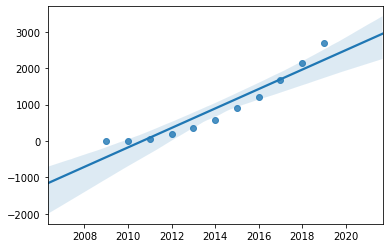

In [29]:
sns.regplot(X,y)

In [48]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X.reshape(-1,1))

In [49]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

16.741680905253315
0.999643472348524


In [50]:
y_poly_pred

array([   2.76560771,    3.44454134,   61.54161656,  177.8207835 ,
        353.04599273,  587.98119485,  883.39034021, 1240.03737795,
       1658.68625867, 2140.10093415, 2685.04535234])

In [51]:
x_test=np.array([2020,2021,2022])
x_test_poly=polynomial_features.fit_transform(x_test.reshape(-1,1))
y_test_pred=model.predict(x_test_poly)

In [52]:
y_test_pred

array([3294.28346479, 3968.57922161, 4708.6965729 ])

In [53]:
model.coef_

array([ 0.00000000e+00,  1.42783649e+06, -7.39060926e+02,  1.27325041e-01])

In [54]:
model.intercept_

-918027147.4726349

$y=122110909.29613158-1.21528801e05*x+3.02373660e01*x^2$

In [58]:
y=model.intercept_+model.coef_[1]*2019+model.coef_[2]*2019*2019+model.coef_[3]*(2019*2019*2019)

In [59]:
y

2685.0453523397446